### QED-C Application-Oriented Benchmarks - Hamiltonian Simulation with HamLib - Observables

The notebook contains specific examples for the HamLib-based Hamiltonian Simulation benchmark program.
Configure and run the cell below with the desired execution settings.
Then configure and run the remaining cell(s), each one a variation of this benchmark.

This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Note: This set of benchmarks exercises new observable-oriented assessments currently under development.
This is a WORK-IN-PROGRESS.


In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
min_qubits=4
max_qubits=16
skip_qubits=1
max_circuits=1
num_shots=10000

K = 1             # number of Trotter steps
t = 0.1          # total evolution time

group_method = "simple"   # method to generate commuting groups
                            # None, "simple", "1", "2", "N"

#group_method = "N"
#group_method = "estimator"

backend_id="qasm_simulator"
#backend_id="statevector_simulator"

hub=""; group=""; project=""
provider_backend = None
exec_options = {}

api = "qiskit"


# *** This example shows how to specify an IBMQ backend using a known "backend_id"
# exec_options = { "optimization_level":3, "use_sessions":True, "resilience_level":1}
# backend_id="ibm_sherbrooke"

# # ==========================
# # *** If using IBM Quantum hardware, run this once to authenticate
# from qiskit_ibm_runtime import QiskitRuntimeService
# QiskitRuntimeService.save_account('YOUR_API_TOKEN_HERE')

# # *** If you use `ibm_quantum` channel, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** If you use `ibm_cloud` channel, set hub, group, and project name here
# hub=""; group=""; project="Cloud Resrouce Name (CRN) or service name"

# *** This example shows how to specify an IBMQ backend using a known "backend_id"
#     See the App-Oriented Benchmarks setup page documentation for more info ob backends and options. 
# exec_options = {
#     "use_ibm_quantum_platform": False,
#     "use_sessions": True,
# }
# backend_id="ibm_fez"



In [3]:
# Configure benchmark library modules
import sys
sys.path.insert(1, "../_common")
sys.path.insert(1, "../_common/qiskit")

import execute
execute.verbose = False
execute.verbose_time = False


# Configure paths for hamlib benchmark modules
sys.path.insert(1, "_common")
sys.path.insert(1, "qiskit")

# ... access to HamLib datasets
import hamlib_utils
hamlib_utils.verbose = False

# ... for api-specific kernel functions (circuits)
import hamlib_simulation_kernel
hamlib_simulation_kernel.verbose = False

# ... for high-level HamLib simulation benchmark loop
import hamlib_simulation_benchmark
hamlib_simulation_benchmark.verbose = False

#hamlib_simulation_benchmark.max_qubits_exact = 20

# set noise to None and uncomment the data_suffix to make an ideal simulator
execute.noise = None
#hamlib_simulation_benchmark.data_suffix = ".noisy"


### Hamiltonian Simulation - Transverse Field Ising Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 08, 2025 08:03:23 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... number of terms in Hamiltonian = 8
... number of circuits executed = 2
... quantum execution time = 0.025
... exact computation time = 0.007 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: -3.5898
    ==> Simulation Quality: 0.897

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... number of terms in Hamiltonian = 10
... number of circuits executed = 2
... quantum execution time = 0.014
... exact computation time = 0.009 sec

    Exact expectation value, computed classically: -3.0
    Estimated expectation value, from quantum algorithm: -2.6953
    ==> Simulation Quality: 0.898

************
Executing [1] circuits with num_qubits = 6
...

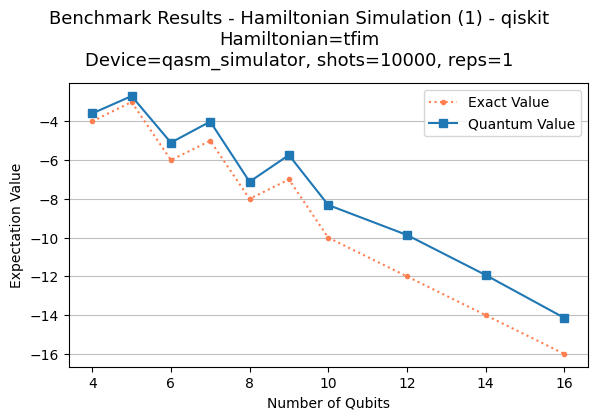

----- Expectation Time Plot -----


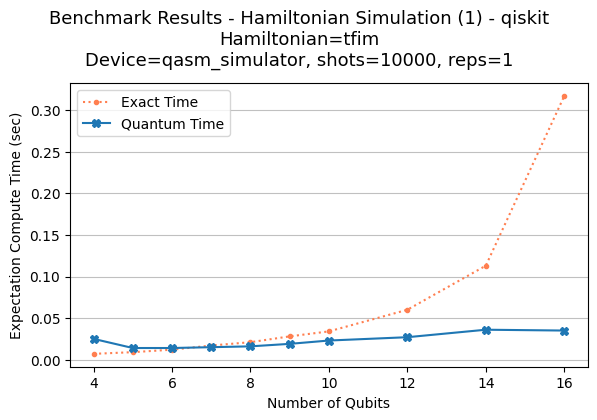

In [4]:
# Transverse Field Ising Model - 1D grid pbc h=2
hamiltonian_name = 'condensedmatter/tfim/tfim'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=1, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True, 
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Heisenberg Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 08, 2025 08:03:30 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... number of terms in Hamiltonian = 16
... number of circuits executed = 3
... quantum execution time = 0.029
... exact computation time = 0.019 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: -4.1211
    ==> Simulation Quality: 1.03

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... number of terms in Hamiltonian = 20
... number of circuits executed = 3
... quantum execution time = 0.028
... exact computation time = 0.028 sec

    Exact expectation value, computed classically: -1.0
    Estimated expectation value, from quantum algorithm: -4.793
    ==> Simulation Quality: 4.793

************
Executing [1] circuits with num_qubits = 6
... 

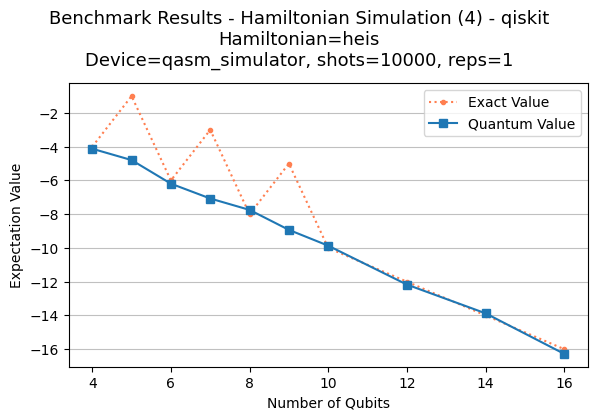

----- Expectation Time Plot -----


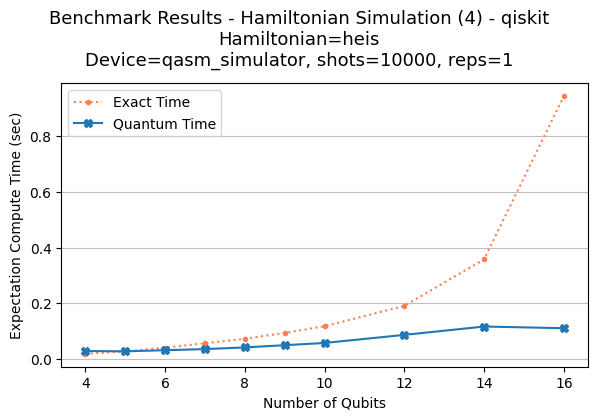

In [5]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/heisenberg/heis'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(
            min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Fermi-Hubbard Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 08, 2025 08:03:35 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-2_U-12_enc-bk
... number of terms in Hamiltonian = 11
... number of circuits executed = 2
... quantum execution time = 0.018
... exact computation time = 0.014 sec

    Exact expectation value, computed classically: -0.0
    Estimated expectation value, from quantum algorithm: 0.0645
    ==> Simulation Quality: 0.0

************
Executing [1] circuits with num_qubits = 6
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-3_U-12_enc-bk
... number of terms in Hamiltonian = 22
... number of circuits executed = 7
... quantum execution time = 0.069
... exact computation time = 0.038 sec

    Exact expectation value, computed classically: -0.0
    Estimated expectation value, from quantum algorithm: 0.0908
    ==> Simulation Quality: 0.0

************
Executing [1] circuits with n

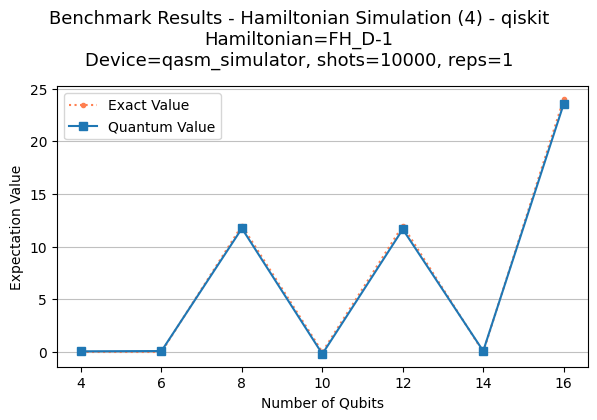

----- Expectation Time Plot -----


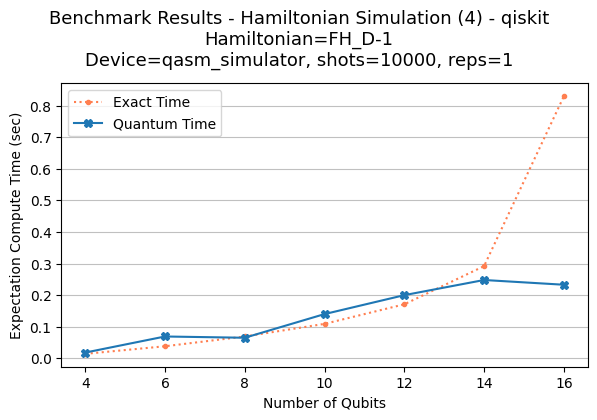

In [6]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/fermihubbard/FH_D-1'
hamiltonian_params = { "1D-grid": "pbc", "enc": "bk", "U":12 }

hamlib_simulation_benchmark.run(
            min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Bose-Hubbard Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 08, 2025 08:03:43 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-2_U-10_enc-gray_d-4
... number of terms in Hamiltonian = 39
... number of circuits executed = 9
... quantum execution time = 0.163
... exact computation time = 0.04 sec

    Exact expectation value, computed classically: 60.0
    Estimated expectation value, from quantum algorithm: 60.0472
    ==> Simulation Quality: 1.001

************
Executing [1] circuits with num_qubits = 6
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-3_U-10_enc-gray_d-4
... number of terms in Hamiltonian = 74
... number of circuits executed = 11
... quantum execution time = 0.343
... exact computation time = 0.117 sec

    Exact expectation value, computed classically: 90.0
    Estimated expectation value, from quantum algorithm: 90.0943
    ==> Simulation Quality: 1.001

************
Execu

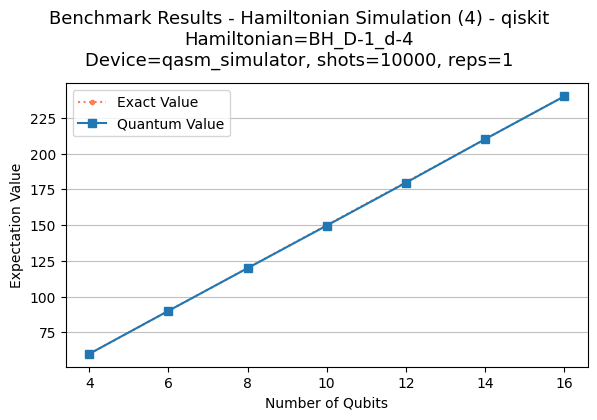

----- Expectation Time Plot -----


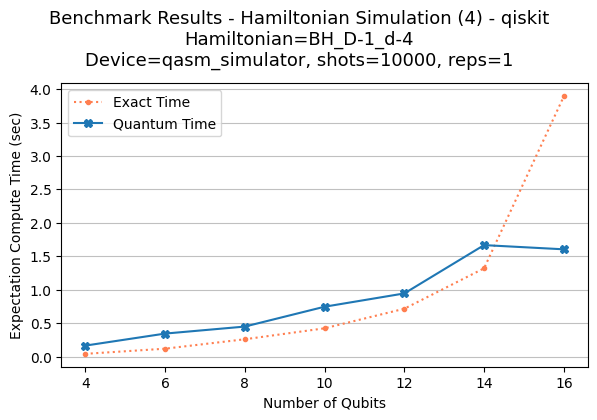

In [7]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/bosehubbard/BH_D-1_d-4'
hamiltonian_params = { "1D-grid": "nonpbc", "enc": "gray", "U":10 }

hamlib_simulation_benchmark.run(
            min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = 0.1,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Observables
This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 08, 2025 08:03:59 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = max3sat_n-4_ratio-2_rinst-02
... number of terms in Hamiltonian = 12
... number of circuits executed = 1
... quantum execution time = 0.015
... exact computation time = 0.015 sec

    Exact expectation value, computed classically: 7.0
    Estimated expectation value, from quantum algorithm: 7.0
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 5
... dataset_name = max3sat_n-5_ratio-2_rinst-02
... number of terms in Hamiltonian = 17
... number of circuits executed = 1
... quantum execution time = 0.015
... exact computation time = 0.024 sec

    Exact expectation value, computed classically: 8.0
    Estimated expectation value, from quantum algorithm: 8.0
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 6
... dataset_name = max3sat_n-6_rat

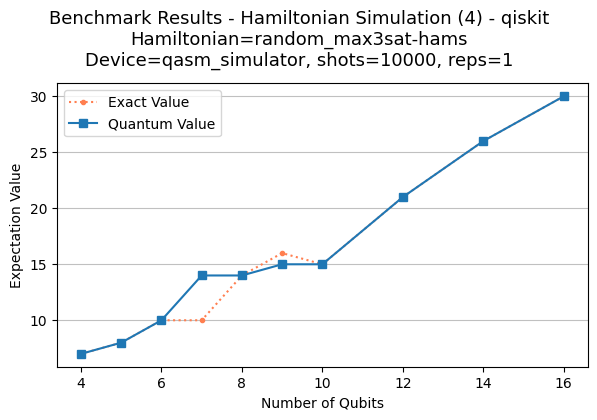

----- Expectation Time Plot -----


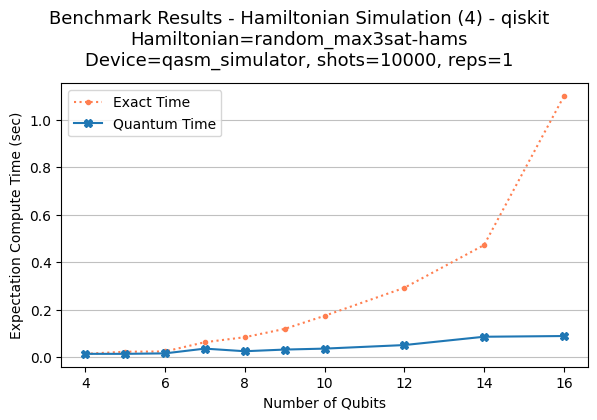

In [8]:
# Max3Sat - ratio 2 rinst 02
hamiltonian_name = 'binaryoptimization/max3sat/random/random_max3sat-hams'
hamiltonian_params = { "ratio": "2", "rinst": "02" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Observables
This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 08, 2025 08:04:03 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = ham_BK-4
... number of terms in Hamiltonian = 15
... number of circuits executed = 3
... quantum execution time = 0.033
... exact computation time = 0.017 sec

    Exact expectation value, computed classically: -0.5367
    Estimated expectation value, from quantum algorithm: -0.5367
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 6
... dataset_name = ham_BK-6
... number of terms in Hamiltonian = 62
... number of circuits executed = 19
... quantum execution time = 0.681
... exact computation time = 0.098 sec

    Exact expectation value, computed classically: -0.5102
    Estimated expectation value, from quantum algorithm: -0.5019
    ==> Simulation Quality: 0.984

************
Executing [1] circuits with num_qubits = 8
... dataset_name = ham_BK-8
... number of terms in Hami

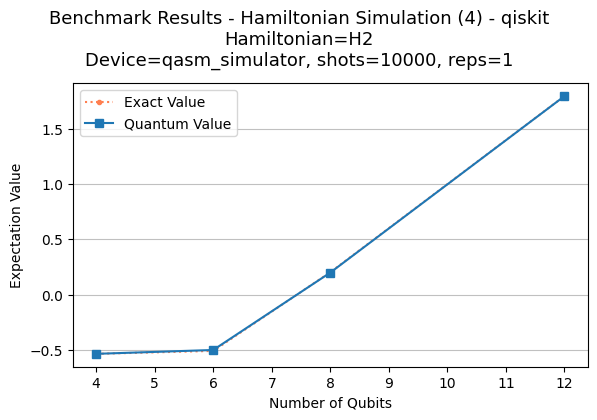

----- Expectation Time Plot -----


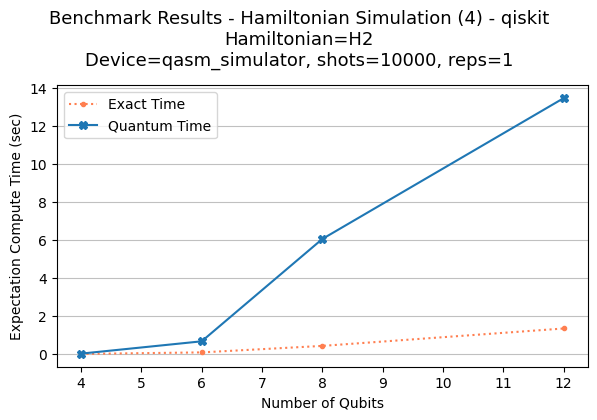

In [9]:
# H2 - BK encoding
hamiltonian_name = 'chemistry/electronic/standard/H2'
hamiltonian_params = { "ham_BK": "" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=min(max_qubits, 12), skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Combined Benchmark Results

In [10]:
import qiskit
print(qiskit.__version__)

1.2.1
